## Библиотеки

In [112]:
import requests as r
import statistics as st
import matplotlib.pyplot as plt

## Данные городов

In [113]:
areas = [

    # Все данные о городах есть в документации hh.ru - https://api.hh.ru/areas
    {"id":"76","name":"Ростов-на-Дону"},# 1
    {"id":"66","name":"Нижний Новгород"},# 2
    {"id":"4","name":"Новосибирск"},# 3!
    {"id":"88","name":"Казань"},# 4
    {"id":"1","name":"Москва"},# 5
    {"id":"2","name":"Санкт-Петербург"},# 6
    {"id":"3","name":"Екатеринбург"}# 7
    ]

## Ввод данных

In [114]:
job = input() # Ввод названия работы
accuracy = int(input()) # Ввод количества объявлений max(100)
page = int(input()) # Ввод количества страниц max(100)

аналитик
100
3


## Сбор данных с сайта hh.ru

In [115]:
list_job = {} # Переменный список для городов и их зарплат
for i in range(len(areas)):
    k = areas[i]['id'] # id города
    list_n = [] # Переменный список для зарплат
    print(areas[i]['name'], "\n") # Вывод названия города
    for n in range(page):
        for j in range(accuracy):
            try:
                url = r.get(f'https://api.hh.ru/vacancies?only_with_salary=true&text={job}&area={k}&per_page={accuracy}&page={page}').json()['items'][j]['salary'] # Зарплата

                # Если начальное значение зарплаты не указано(от скольки)
                if url['from'] == None:

                    # Проверка если зп была указана в долларах
                    if url['currency'] == 'USD':
                        url['to'] *= 100

                    # Проверка если зп указана дневная
                    if url['to'] < 10000 and url['to'] >= 1000:
                      list_n.append(url['to'] * 15)
                    else:
                      list_n.append(url['to'])


                # Если конечное значение зарплаты не указано(до скольки)
                elif url['to'] == None: # если 'from': 1, 'to': None

                    # Проверка если зп была указана в долларах
                    if url['currency'] == 'USD':
                        url['from'] *= 100

                    # Проверка если зп указана дневная
                    if url['from'] < 10000 and url['from'] >= 1000:
                      list_n.append(url['from'] * 15)
                    else:
                      list_n.append(url['from'])


                # Если указаны оба значения(от скольки + до скольки)
                else:

                    # Проверка если зп была указана в долларах
                    if url['currency'] == 'USD':
                        url['from'] *= 100
                        url['to'] *= 100

                    # Проверка если зп указана дневная
                    if url['from'] <= 10000 and url['to'] <= 10000:
                      list_n.append( int(((url['from'] + url['to']) / 2) * 15) )
                    else:
                      median_of_nums = int((url['from'] + url['to']) / 2)
                      list_n.append(median_of_nums)

                print(j, '', url) # Вывод зарплаты

            except IndexError:
              print('Объявление не найденно')
              continue

        list_job[areas[i]['name']] = list_n
        print(len(list_job[areas[i]['name']]))

Ростов-на-Дону 

0  {'from': 30000, 'to': None, 'currency': 'RUR', 'gross': False}
1  {'from': 40000, 'to': 60000, 'currency': 'RUR', 'gross': True}
2  {'from': 60000, 'to': None, 'currency': 'RUR', 'gross': True}
3  {'from': 80000, 'to': 150000, 'currency': 'RUR', 'gross': False}
4  {'from': None, 'to': 57000, 'currency': 'RUR', 'gross': True}
5  {'from': 100000, 'to': None, 'currency': 'RUR', 'gross': True}
6  {'from': 170000, 'to': 250000, 'currency': 'RUR', 'gross': True}
7  {'from': 45000, 'to': None, 'currency': 'RUR', 'gross': False}
8  {'from': None, 'to': 110000, 'currency': 'RUR', 'gross': False}
9  {'from': 50000, 'to': None, 'currency': 'RUR', 'gross': False}
10  {'from': 80000, 'to': None, 'currency': 'RUR', 'gross': False}
11  {'from': 40000, 'to': None, 'currency': 'RUR', 'gross': True}
12  {'from': 100000, 'to': 160000, 'currency': 'RUR', 'gross': False}
13  {'from': 70000, 'to': 120000, 'currency': 'RUR', 'gross': False}
14  {'from': 100000, 'to': None, 'currency': 'RU

21  {'from': 200000, 'to': 380000, 'currency': 'RUR', 'gross': True}
22  {'from': 38000, 'to': 42000, 'currency': 'RUR', 'gross': False}
23  {'from': 80000, 'to': 120000, 'currency': 'RUR', 'gross': False}
24  {'from': 45000, 'to': 100000, 'currency': 'RUR', 'gross': False}
25  {'from': None, 'to': 50000, 'currency': 'RUR', 'gross': False}
26  {'from': 70000, 'to': 120000, 'currency': 'RUR', 'gross': False}
27  {'from': 45000, 'to': None, 'currency': 'RUR', 'gross': False}
28  {'from': 120000, 'to': None, 'currency': 'RUR', 'gross': False}
29  {'from': 70000, 'to': 100000, 'currency': 'RUR', 'gross': False}
30  {'from': 40000, 'to': None, 'currency': 'RUR', 'gross': False}
31  {'from': 70000, 'to': 110000, 'currency': 'RUR', 'gross': False}
32  {'from': 85000, 'to': None, 'currency': 'RUR', 'gross': False}
33  {'from': 60000, 'to': 80000, 'currency': 'RUR', 'gross': True}
34  {'from': 80000, 'to': 200000, 'currency': 'RUR', 'gross': True}
35  {'from': 40000, 'to': None, 'currency': 'RU

42  {'from': 80000, 'to': 150000, 'currency': 'RUR', 'gross': False}
43  {'from': 130000, 'to': 300000, 'currency': 'RUR', 'gross': False}
44  {'from': 70000, 'to': 180000, 'currency': 'RUR', 'gross': True}
45  {'from': 35000, 'to': 110000, 'currency': 'RUR', 'gross': False}
46  {'from': 70000, 'to': 120000, 'currency': 'RUR', 'gross': False}
47  {'from': 45000, 'to': None, 'currency': 'RUR', 'gross': False}
48  {'from': 50000, 'to': 100000, 'currency': 'RUR', 'gross': False}
49  {'from': 75000, 'to': None, 'currency': 'RUR', 'gross': False}
50  {'from': 90000, 'to': None, 'currency': 'RUR', 'gross': True}
51  {'from': 80000, 'to': 250000, 'currency': 'RUR', 'gross': False}
52  {'from': 70000, 'to': 90000, 'currency': 'RUR', 'gross': False}
53  {'from': 40000, 'to': None, 'currency': 'RUR', 'gross': False}
54  {'from': 52000, 'to': 52000, 'currency': 'RUR', 'gross': True}
55  {'from': 40000, 'to': 120000, 'currency': 'RUR', 'gross': False}
56  {'from': 100000, 'to': None, 'currency': '

63  {'from': 95000, 'to': None, 'currency': 'RUR', 'gross': True}
64  {'from': 100000, 'to': None, 'currency': 'RUR', 'gross': False}
65  {'from': 150000, 'to': 300000, 'currency': 'RUR', 'gross': True}
66  {'from': 57000, 'to': None, 'currency': 'RUR', 'gross': True}
67  {'from': 35000, 'to': 80000, 'currency': 'RUR', 'gross': False}
68  {'from': 57050, 'to': None, 'currency': 'RUR', 'gross': True}
69  {'from': 90000, 'to': 120000, 'currency': 'RUR', 'gross': False}
70  {'from': 150000, 'to': None, 'currency': 'RUR', 'gross': False}
71  {'from': 160000, 'to': 250000, 'currency': 'RUR', 'gross': False}
72  {'from': 100000, 'to': 100000, 'currency': 'RUR', 'gross': True}
73  {'from': 55000, 'to': None, 'currency': 'RUR', 'gross': False}
74  {'from': 180000, 'to': None, 'currency': 'RUR', 'gross': False}
75  {'from': 100000, 'to': None, 'currency': 'RUR', 'gross': False}
76  {'from': 60000, 'to': None, 'currency': 'RUR', 'gross': False}
77  {'from': 70000, 'to': None, 'currency': 'RUR', 

85  {'from': 82000, 'to': None, 'currency': 'RUR', 'gross': False}
86  {'from': 100000, 'to': None, 'currency': 'RUR', 'gross': False}
87  {'from': 150000, 'to': 300000, 'currency': 'RUR', 'gross': False}
88  {'from': 45800, 'to': 54700, 'currency': 'RUR', 'gross': True}
89  {'from': None, 'to': 51000, 'currency': 'RUR', 'gross': True}
90  {'from': 120000, 'to': 200000, 'currency': 'RUR', 'gross': False}
91  {'from': 80000, 'to': None, 'currency': 'RUR', 'gross': False}
92  {'from': 60000, 'to': None, 'currency': 'RUR', 'gross': False}
93  {'from': 40000, 'to': None, 'currency': 'RUR', 'gross': False}
94  {'from': 50000, 'to': 100000, 'currency': 'RUR', 'gross': False}
95  {'from': 75200, 'to': 117300, 'currency': 'RUR', 'gross': True}
96  {'from': 70000, 'to': 100000, 'currency': 'RUR', 'gross': True}
97  {'from': 60000, 'to': None, 'currency': 'RUR', 'gross': False}
98  {'from': 30000, 'to': 70000, 'currency': 'RUR', 'gross': False}
99  {'from': 70000, 'to': 80000, 'currency': 'RUR',

6  {'from': 120000, 'to': None, 'currency': 'RUR', 'gross': False}
7  {'from': 75000, 'to': 100000, 'currency': 'RUR', 'gross': False}
8  {'from': 35000, 'to': None, 'currency': 'RUR', 'gross': False}
9  {'from': 25000, 'to': 60000, 'currency': 'RUR', 'gross': False}
10  {'from': 60000, 'to': None, 'currency': 'RUR', 'gross': False}
11  {'from': 39000, 'to': None, 'currency': 'RUR', 'gross': False}
12  {'from': 80000, 'to': 120000, 'currency': 'RUR', 'gross': False}
13  {'from': 70000, 'to': 100000, 'currency': 'RUR', 'gross': False}
14  {'from': 130000, 'to': None, 'currency': 'RUR', 'gross': False}
15  {'from': 55000, 'to': 90000, 'currency': 'RUR', 'gross': False}
16  {'from': 70000, 'to': 95000, 'currency': 'RUR', 'gross': False}
17  {'from': 70000, 'to': 100000, 'currency': 'RUR', 'gross': False}
18  {'from': 50000, 'to': 70000, 'currency': 'RUR', 'gross': False}
19  {'from': 60000, 'to': None, 'currency': 'RUR', 'gross': False}
20  {'from': 50000, 'to': 100000, 'currency': 'RUR',

27  {'from': 100000, 'to': None, 'currency': 'RUR', 'gross': False}
28  {'from': 200000, 'to': 250000, 'currency': 'RUR', 'gross': False}
29  {'from': 40000, 'to': 70000, 'currency': 'RUR', 'gross': False}
30  {'from': None, 'to': 250000, 'currency': 'RUR', 'gross': False}
31  {'from': 40000, 'to': 80000, 'currency': 'RUR', 'gross': False}
32  {'from': 40000, 'to': 80000, 'currency': 'RUR', 'gross': False}
33  {'from': 80000, 'to': None, 'currency': 'RUR', 'gross': True}
34  {'from': 80000, 'to': None, 'currency': 'RUR', 'gross': True}
35  {'from': 80000, 'to': None, 'currency': 'RUR', 'gross': False}
36  {'from': 50000, 'to': 100000, 'currency': 'RUR', 'gross': True}
37  {'from': 60000, 'to': None, 'currency': 'RUR', 'gross': False}
38  {'from': 120000, 'to': 250000, 'currency': 'RUR', 'gross': False}
39  {'from': 70000, 'to': None, 'currency': 'RUR', 'gross': False}
40  {'from': 90000, 'to': 100000, 'currency': 'RUR', 'gross': False}
41  {'from': 85000, 'to': None, 'currency': 'RUR',

48  {'from': 80000, 'to': 150000, 'currency': 'RUR', 'gross': False}
49  {'from': 80000, 'to': None, 'currency': 'RUR', 'gross': False}
50  {'from': 50000, 'to': None, 'currency': 'RUR', 'gross': False}
51  {'from': 40000, 'to': 100000, 'currency': 'RUR', 'gross': False}
52  {'from': 50000, 'to': 60000, 'currency': 'RUR', 'gross': False}
53  {'from': 70000, 'to': None, 'currency': 'RUR', 'gross': False}
54  {'from': 80000, 'to': None, 'currency': 'RUR', 'gross': False}
55  {'from': None, 'to': 80000, 'currency': 'RUR', 'gross': False}
56  {'from': 240000, 'to': 280000, 'currency': 'RUR', 'gross': False}
57  {'from': 50000, 'to': 70000, 'currency': 'RUR', 'gross': False}
58  {'from': 90000, 'to': 120000, 'currency': 'RUR', 'gross': False}
59  {'from': 120000, 'to': 160000, 'currency': 'RUR', 'gross': False}
60  {'from': 50000, 'to': 70000, 'currency': 'RUR', 'gross': True}
61  {'from': 60000, 'to': 75000, 'currency': 'RUR', 'gross': False}
62  {'from': 100000, 'to': None, 'currency': 'R

70  {'from': None, 'to': 100000, 'currency': 'RUR', 'gross': True}
71  {'from': 40000, 'to': 100000, 'currency': 'RUR', 'gross': False}
72  {'from': 58000, 'to': None, 'currency': 'RUR', 'gross': True}
73  {'from': 70000, 'to': None, 'currency': 'RUR', 'gross': False}
74  {'from': 180000, 'to': None, 'currency': 'RUR', 'gross': False}
75  {'from': 80000, 'to': None, 'currency': 'RUR', 'gross': True}
76  {'from': 62500, 'to': None, 'currency': 'RUR', 'gross': True}
77  {'from': 60000, 'to': 70000, 'currency': 'RUR', 'gross': True}
78  {'from': 70000, 'to': None, 'currency': 'RUR', 'gross': False}
79  {'from': 90000, 'to': 150000, 'currency': 'RUR', 'gross': False}
80  {'from': 70000, 'to': None, 'currency': 'RUR', 'gross': False}
81  {'from': 70000, 'to': None, 'currency': 'RUR', 'gross': False}
82  {'from': 150000, 'to': 180000, 'currency': 'RUR', 'gross': True}
83  {'from': 80000, 'to': 150000, 'currency': 'RUR', 'gross': False}
84  {'from': 70000, 'to': None, 'currency': 'RUR', 'gros

92  {'from': 90000, 'to': 170000, 'currency': 'RUR', 'gross': False}
93  {'from': 60000, 'to': 100000, 'currency': 'RUR', 'gross': True}
94  {'from': 150000, 'to': None, 'currency': 'RUR', 'gross': False}
95  {'from': 40000, 'to': 100000, 'currency': 'RUR', 'gross': False}
96  {'from': 60000, 'to': 120000, 'currency': 'RUR', 'gross': True}
97  {'from': 90000, 'to': 150000, 'currency': 'RUR', 'gross': True}
98  {'from': 70000, 'to': 130000, 'currency': 'RUR', 'gross': False}
99  {'from': None, 'to': 200000, 'currency': 'RUR', 'gross': True}
200
0  {'from': 50000, 'to': None, 'currency': 'RUR', 'gross': False}
1  {'from': 60000, 'to': None, 'currency': 'RUR', 'gross': False}
2  {'from': 50000, 'to': 70000, 'currency': 'RUR', 'gross': False}
3  {'from': None, 'to': 200000, 'currency': 'RUR', 'gross': True}
4  {'from': 50000, 'to': None, 'currency': 'RUR', 'gross': True}
5  {'from': 70000, 'to': 120000, 'currency': 'RUR', 'gross': True}
6  {'from': 75000, 'to': 120000, 'currency': 'RUR', '

13  {'from': 200000, 'to': 250000, 'currency': 'RUR', 'gross': True}
14  {'from': 150000, 'to': 250000, 'currency': 'USD', 'gross': False}
15  {'from': None, 'to': 150000, 'currency': 'RUR', 'gross': True}
16  {'from': 150000, 'to': 350000, 'currency': 'RUR', 'gross': False}
17  {'from': 150000, 'to': 350000, 'currency': 'RUR', 'gross': False}
18  {'from': None, 'to': 70000, 'currency': 'RUR', 'gross': False}
19  {'from': 130000, 'to': None, 'currency': 'RUR', 'gross': False}
20  {'from': 222000, 'to': 257000, 'currency': 'RUR', 'gross': True}
21  {'from': 80000, 'to': 80000, 'currency': 'RUR', 'gross': False}
22  {'from': 25000, 'to': 80000, 'currency': 'RUR', 'gross': False}
23  {'from': 10000, 'to': 20000, 'currency': 'RUR', 'gross': False}
24  {'from': 80000, 'to': 150000, 'currency': 'RUR', 'gross': False}
25  {'from': 57000, 'to': None, 'currency': 'RUR', 'gross': False}
26  {'from': 30000, 'to': None, 'currency': 'RUR', 'gross': True}
27  {'from': 110000, 'to': 130000, 'currency

34  {'from': 50000, 'to': 100000, 'currency': 'RUR', 'gross': False}
35  {'from': 75000, 'to': 125000, 'currency': 'RUR', 'gross': False}
36  {'from': 95000, 'to': None, 'currency': 'RUR', 'gross': False}
37  {'from': 350000, 'to': None, 'currency': 'RUR', 'gross': True}
38  {'from': 90000, 'to': 120000, 'currency': 'RUR', 'gross': False}
39  {'from': 200000, 'to': 250000, 'currency': 'RUR', 'gross': False}
40  {'from': 50000, 'to': 65000, 'currency': 'RUR', 'gross': False}
41  {'from': 80000, 'to': 150000, 'currency': 'RUR', 'gross': False}
42  {'from': 300000, 'to': 400000, 'currency': 'USD', 'gross': False}
43  {'from': 200000, 'to': 250000, 'currency': 'RUR', 'gross': False}
44  {'from': 70000, 'to': 150000, 'currency': 'RUR', 'gross': False}
45  {'from': 120000, 'to': None, 'currency': 'RUR', 'gross': True}
46  {'from': 60000, 'to': 150000, 'currency': 'RUR', 'gross': False}
47  {'from': 130000, 'to': 150000, 'currency': 'RUR', 'gross': False}
48  {'from': 80000, 'to': None, 'curr

55  {'from': 90000, 'to': None, 'currency': 'RUR', 'gross': False}
56  {'from': None, 'to': 300000, 'currency': 'RUR', 'gross': False}
57  {'from': 30000, 'to': 35000, 'currency': 'RUR', 'gross': False}
58  {'from': 80000, 'to': None, 'currency': 'RUR', 'gross': True}
59  {'from': 80000, 'to': 90000, 'currency': 'RUR', 'gross': False}
60  {'from': 84000, 'to': 84000, 'currency': 'RUR', 'gross': True}
61  {'from': 250000, 'to': None, 'currency': 'RUR', 'gross': False}
62  {'from': 75000, 'to': 87000, 'currency': 'RUR', 'gross': True}
63  {'from': 80000, 'to': 120000, 'currency': 'RUR', 'gross': False}
64  {'from': 50000, 'to': 90000, 'currency': 'RUR', 'gross': False}
65  {'from': 100000, 'to': 120000, 'currency': 'RUR', 'gross': True}
66  {'from': 200000, 'to': 300000, 'currency': 'USD', 'gross': False}
67  {'from': 500000, 'to': None, 'currency': 'RUR', 'gross': False}
68  {'from': 60000, 'to': 60000, 'currency': 'RUR', 'gross': False}
69  {'from': None, 'to': 500000, 'currency': 'RUR

76  {'from': 72000, 'to': 72000, 'currency': 'RUR', 'gross': False}
77  {'from': 50000, 'to': None, 'currency': 'RUR', 'gross': False}
78  {'from': 55000, 'to': 60000, 'currency': 'RUR', 'gross': False}
79  {'from': 100000, 'to': None, 'currency': 'RUR', 'gross': False}
80  {'from': 200000, 'to': 300000, 'currency': 'RUR', 'gross': False}
81  {'from': 25000, 'to': None, 'currency': 'RUR', 'gross': False}
82  {'from': 110000, 'to': None, 'currency': 'RUR', 'gross': False}
83  {'from': 15000, 'to': None, 'currency': 'RUR', 'gross': False}
84  {'from': None, 'to': 115000, 'currency': 'RUR', 'gross': True}
85  {'from': 80000, 'to': None, 'currency': 'RUR', 'gross': False}
86  {'from': 120000, 'to': None, 'currency': 'RUR', 'gross': False}
87  {'from': 45000, 'to': 70000, 'currency': 'RUR', 'gross': False}
88  {'from': 45000, 'to': 80000, 'currency': 'RUR', 'gross': False}
89  {'from': None, 'to': 150000, 'currency': 'RUR', 'gross': False}
90  {'from': 50000, 'to': None, 'currency': 'RUR', 

97  {'from': 150000, 'to': 250000, 'currency': 'RUR', 'gross': False}
98  {'from': 50000, 'to': 60000, 'currency': 'RUR', 'gross': False}
99  {'from': 60000, 'to': 100000, 'currency': 'RUR', 'gross': False}
200
0  {'from': 150000, 'to': None, 'currency': 'RUR', 'gross': True}
1  {'from': 90000, 'to': 160000, 'currency': 'RUR', 'gross': True}
2  {'from': 180000, 'to': 230000, 'currency': 'RUR', 'gross': False}
3  {'from': 70000, 'to': 200000, 'currency': 'USD', 'gross': False}
4  {'from': 100000, 'to': None, 'currency': 'RUR', 'gross': False}
5  {'from': 90000, 'to': None, 'currency': 'RUR', 'gross': True}
6  {'from': 150000, 'to': 200000, 'currency': 'RUR', 'gross': True}
7  {'from': 80000, 'to': None, 'currency': 'RUR', 'gross': False}
8  {'from': 140000, 'to': None, 'currency': 'RUR', 'gross': False}
9  {'from': 70000, 'to': None, 'currency': 'RUR', 'gross': True}
10  {'from': None, 'to': 60000, 'currency': 'RUR', 'gross': True}
11  {'from': 70000, 'to': None, 'currency': 'RUR', 'gro

18  {'from': 50000, 'to': 70000, 'currency': 'RUR', 'gross': False}
19  {'from': 70000, 'to': 80000, 'currency': 'RUR', 'gross': True}
20  {'from': 500000, 'to': None, 'currency': 'RUR', 'gross': False}
21  {'from': 70000, 'to': 100000, 'currency': 'RUR', 'gross': False}
22  {'from': 100000, 'to': None, 'currency': 'RUR', 'gross': True}
23  {'from': 80000, 'to': None, 'currency': 'RUR', 'gross': False}
24  {'from': 60000, 'to': 300000, 'currency': 'RUR', 'gross': True}
25  {'from': 45000, 'to': None, 'currency': 'RUR', 'gross': False}
26  {'from': 100000, 'to': None, 'currency': 'RUR', 'gross': False}
27  {'from': 80000, 'to': 100000, 'currency': 'RUR', 'gross': False}
28  {'from': 122500, 'to': None, 'currency': 'RUR', 'gross': None}
29  {'from': 70000, 'to': 70000, 'currency': 'RUR', 'gross': False}
30  {'from': 90000, 'to': 110000, 'currency': 'RUR', 'gross': True}
31  {'from': 70000, 'to': None, 'currency': 'RUR', 'gross': False}
32  {'from': 70000, 'to': None, 'currency': 'RUR', '

40  {'from': 80000, 'to': None, 'currency': 'RUR', 'gross': True}
41  {'from': 80000, 'to': 150000, 'currency': 'RUR', 'gross': True}
42  {'from': 70000, 'to': 70000, 'currency': 'RUR', 'gross': False}
43  {'from': 100000, 'to': 180000, 'currency': 'RUR', 'gross': False}
44  {'from': 50000, 'to': 150000, 'currency': 'RUR', 'gross': False}
45  {'from': None, 'to': 80000, 'currency': 'RUR', 'gross': False}
46  {'from': 100000, 'to': None, 'currency': 'RUR', 'gross': False}
47  {'from': 55000, 'to': 70000, 'currency': 'RUR', 'gross': False}
48  {'from': 60000, 'to': 65000, 'currency': 'RUR', 'gross': False}
49  {'from': None, 'to': 90000, 'currency': 'RUR', 'gross': False}
50  {'from': 50000, 'to': 60000, 'currency': 'RUR', 'gross': False}
51  {'from': 35000, 'to': None, 'currency': 'RUR', 'gross': False}
52  {'from': 70000, 'to': None, 'currency': 'RUR', 'gross': False}
53  {'from': 60000, 'to': None, 'currency': 'RUR', 'gross': False}
54  {'from': 40000, 'to': None, 'currency': 'RUR', '

62  {'from': 80000, 'to': None, 'currency': 'RUR', 'gross': True}
63  {'from': 35000, 'to': None, 'currency': 'RUR', 'gross': False}
64  {'from': 60000, 'to': None, 'currency': 'RUR', 'gross': False}
65  {'from': 40000, 'to': None, 'currency': 'RUR', 'gross': False}
66  {'from': 80000, 'to': None, 'currency': 'RUR', 'gross': False}
67  {'from': 50000, 'to': 150000, 'currency': 'RUR', 'gross': False}
68  {'from': 100000, 'to': None, 'currency': 'RUR', 'gross': False}
69  {'from': 80000, 'to': 130000, 'currency': 'RUR', 'gross': True}
70  {'from': 120000, 'to': None, 'currency': 'RUR', 'gross': False}
71  {'from': 30000, 'to': None, 'currency': 'RUR', 'gross': False}
72  {'from': 120000, 'to': 160000, 'currency': 'RUR', 'gross': False}
73  {'from': 45000, 'to': 50000, 'currency': 'RUR', 'gross': False}
74  {'from': 80000, 'to': 120000, 'currency': 'RUR', 'gross': True}
75  {'from': 80000, 'to': 130000, 'currency': 'RUR', 'gross': False}
76  {'from': 80000, 'to': None, 'currency': 'RUR', 

## Среднеарифметическая зарплата


In [116]:
data_average = []
data_average_dict = {}
for i in range(len(areas)):
  sum = 0
  for j in range(page*accuracy):
    sum += list_job[areas[i]['name']][j]
  data_average_dict[areas[i]['name']] = int(sum / (page*accuracy)) 
  data_average.append(int(sum / (page*accuracy)))
print(data_average_dict)
print(data_average)

{'Ростов-на-Дону': 96991, 'Нижний Новгород': 94034, 'Новосибирск': 91139, 'Казань': 96912, 'Москва': 146138, 'Санкт-Петербург': 104721, 'Екатеринбург': 84930}
[96991, 94034, 91139, 96912, 146138, 104721, 84930]


## Медиананная зарплата

In [117]:
data_median = []
data_median_dict = {}
for i in range(len(areas)):
  data_median_dict[areas[i]['name']] = st.median(list_job[areas[i]['name']])
  data_median.append(st.median(list_job[areas[i]['name']]))
print(data_median_dict)
print(data_median)

{'Ростов-на-Дону': 80000.0, 'Нижний Новгород': 80000.0, 'Новосибирск': 75000.0, 'Казань': 80000.0, 'Москва': 115000.0, 'Санкт-Петербург': 87500.0, 'Екатеринбург': 75000.0}
[80000.0, 80000.0, 75000.0, 80000.0, 115000.0, 87500.0, 75000.0]


## Список городов

In [118]:
list_city = [] # Список названий городов
for i in range(len(areas)):
  list_city.append(areas[i]['name'])
print(list_city)

['Ростов-на-Дону', 'Нижний Новгород', 'Новосибирск', 'Казань', 'Москва', 'Санкт-Петербург', 'Екатеринбург']


## Нахождение MAX И MIN

In [119]:
max_med = max(data_median) # Самая высокая зп
min_med = min(data_median) # Самая низкая зп
print(max_med)
print(min_med)
print(list_city[data_median.index(max_med)]) # Город с самой высокой зп
print(list_city[data_median.index(min_med)]) # Город с самой низкой зп

115000.0
75000.0
Москва
Новосибирск


## Графики

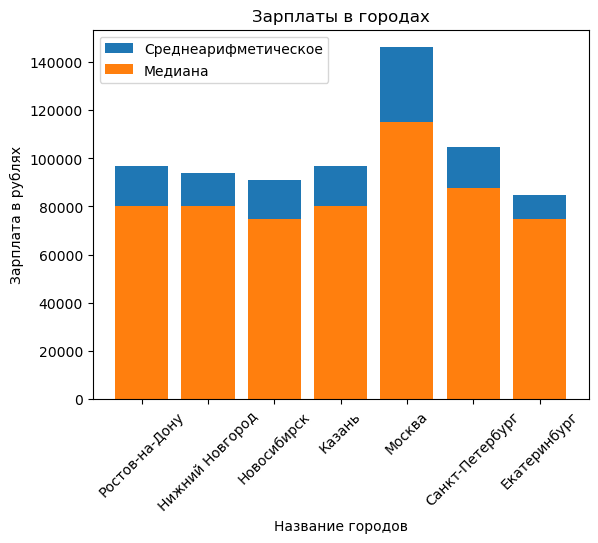

In [120]:
x = list_city
y = data_average
y1 = data_median

plt.bar(x, y, label='Среднеарифметическое')
plt.bar(x, y1, label='Медиана')
plt.xlabel('Название городов')
plt.xticks(rotation=45)
plt.ylabel('Зарплата в рублях')
plt.title('Зарплаты в городах')
plt.legend()
plt.show()

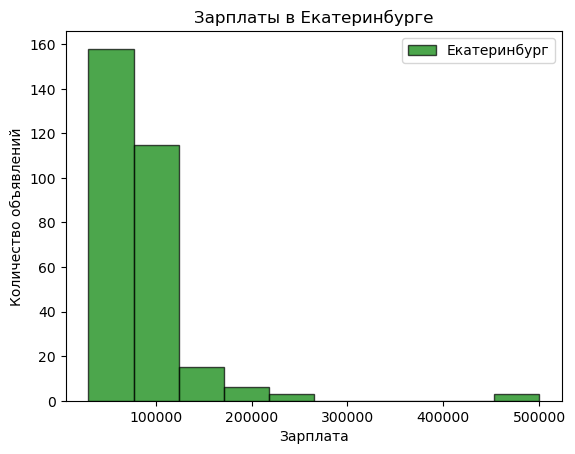

In [121]:
x = sorted(list_job['Екатеринбург'])

plt.hist(x,edgecolor='black',alpha = 0.7,color='green', label='Екатеринбург')
plt.xlabel('Зарплата')
plt.ylabel('Количество объявлений')
plt.title('Зарплаты в Екатеринбурге')
plt.legend()
plt.show()